In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Deja vu

Deja vu. It literally translates as 'already seen'. That feeling of having been there before. Done it before.

It's a feeling you might get in portions of this lesson. That's because time is something we've dealt with before. Many of the data sources we've covered in the course have some element of time involved, and we've even approached ways to deal with it so far. So, before we get too involved in all of these specialized techniques and concepts, let's take some time to review what we've already covered and how we can use it in terms of time.

## Plotting time

Now, we've spent a lot of time plotting variables so far in this course, and those techniques of course still have validity in a time dependent context.

You can still make a scatter plot.

You can still make a bar plot.

You can still do _almost everything_ we've done before.

It is worth noting, however, that some plots are better at presenting a relationship with time than others. Time is a relationship. It implies that one point, one observation is related to another in a typically linear, directed sense. We want our plots to reflect that relationship.

Let's take this basic dataset below as an example, about how much you've learned over time, say, when you were taking a course...

In [2]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Now, we've seen data like this before. And we have many ways we could plot it, each one reflecting its own relationships or lack thereof. Let's look at some below. 

Text(0.5, 1.0, 'Scatter Plot')

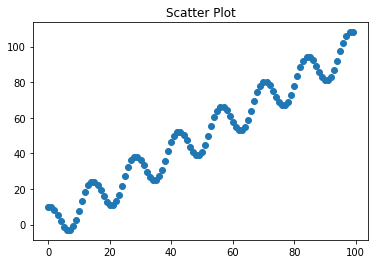

In [3]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

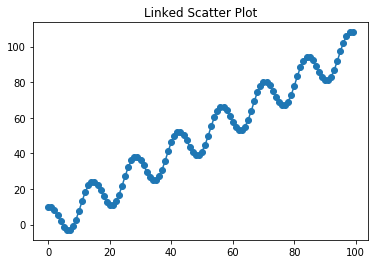

In [4]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

/Users/megandibble/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


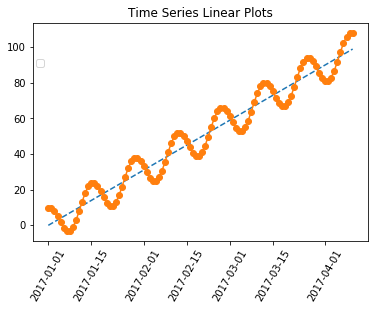

In [5]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

As you can see, there are a lot of plots you can make with this data (and you could make many more), but not all plots are created equal.

Take that first scatter plot. It seems to have a trend, but it doesn't imply any relationship between the points themselves. You don't know how one is related to the one next to it except by suspicion. 

The second plot has a bit more information. It's still a scatter, but by connecting the dots (actually by overlaying a line) we imply a progression from point to point. One goes to the other goes to the next. This gives us a little more information that the previous plot was able to convey.

The third plot has a time based axis. This is nice because it gives us a real sense of the scale of time. However, we lose some of the scatter like relationship between the two points, instead showing their equivalence by having them marked at the same date along the timeline.

None of these plots are "right" or "wrong" per se. They're just all different. When you deal with data like this you have to decide what you want to show and how to best tell your story, while noting that the inclusion of time does effect those processes.

## Things get messy

One of the most common complaints about Python, at least from an analytics perspective, is time; specifically how Python handles time as a data type. Really, the issue stems from the fact that there *isn't* one single date type in Python. There are several. For the most part you'll want to rely on the date and time tools Pandas gives you. However in the wild you'll run into timestamps. Or timedeltas. Or [Unix epoch time](https://en.wikipedia.org/wiki/Unix_time). Your time data may be "naive" or "aware". From [the Python docs](https://docs.python.org/3/library/datetime.html):

>An aware object has sufficient knowledge of applicable algorithmic and political time adjustments, such as time zone and daylight saving time information, to locate itself relative to other aware objects. An aware object is used to represent a specific moment in time that is not open to interpretation.
>
>A naive object does not contain enough information to unambiguously locate itself relative to other date/time objects. Whether a naive object represents Coordinated Universal Time (UTC), local time, or time in some other timezone is purely up to the program, just like it is up to the program whether a particular number represents metres, miles, or mass. Naive objects are easy to understand and to work with, at the cost of ignoring some aspects of reality.

On top of the complexity of your underlying _data_, layer on the panalopy of _formatting options_ for displaying the time with or without timezones.

In general we'll try to stick with pandas' ways of handling time, and you have the `pd.to_datetime()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to get you out of a jam when you find yourself dealing with something else that isn't quite behaving in the way you want. We won't dive into timezones deeply here, but if you work with time much there's plenty of rabbit hole for you to go down.

![image](https://imgs.xkcd.com/comics/supervillain_plan.png)

## Concerns of time

Time is not a variable like every other. It has specific concerns. Before we talk about how to model those concerns, we should identify what they are. This will directly affect how we model them.

**Trends** are probably the most common concern with time. Things change over time, and a trend is a way to quantify how that change is occurring. Sometimes that trend will be linear, other times it may have a different functional form. The key is the data is moving in a direction as time passes, and understanding the direction and speed of that change can fundamentally affect a business.

**Seasonality** is another concept we've encountered before. This is the idea that there is a repeating pattern over some period of time. Ice cream sales are higher in summer than in winter. Retail sales might be stronger on the weekends, or people might tend to miss morning appointments. Seasonality concerns arise whenever you have a repeating pattern over a set, consistent period of time, whether that time period is a season, a week a day, an hour.

**Events** are the final type of concern we'll talk about. Events are a moment in time where everything changes. It can be a phase shift, a shock, or a total change of directions. What it means practically is that what comes before is not the same as what comes after. How that change manifests depends on the data, but the inclusion of time allows us to find events and adjust accordingly.

## Basics of Modeling Time

Now that we've introduced time as a concept, let's discuss how to include it in our models. After all, we've spent so much of this course covering how to build various models, it would be quite a shame if we didn't learn how to model time. For this, let's work with the same data as the previous lesson.

In [6]:
# Create a data frame.
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 3.5) + np.arange(0, 100)

Now, this is an extremely simple example scenario, and you can easily see the time series trends we're inducing into the data from the code. But how could we model them?

In this case we'll be working with a linear model. It is also worth noting that time series work is often done with least squares linear models and extensions thereof, because of their explanatory power. How things change over time is often a key learning of the model.

## Linear Trends

Perhaps the most intuitive way to deal with time series data is with a simple linear trend. This treats time just like any other variable. Let's say we were trying to explain variance in confidence over time.

That model could look something like this:

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9434054498353532

In [8]:
lm.coef_[0]

1.161624877097711e-14

In [9]:
# Convert coefficient from nanoseconds to days.
lm.coef_[0] * 1000000000 * 24 * 60 * 60

1.0036438938124224

So there are a few things to note here. Firstly, sklearn requires all inputs to to be numeric, so you have to convert your timestamps to numeric. `pd.to_numeric` will do the job, converting the column to nanoseconds since January 1, 1970 (also referred to as _epoch time_ in nanoseconds, as typical epoch time is simply in seconds). This still allows for us to do the same linear trend, but we have to do our coefficient interpretation either in nanoseconds or with a conversion.

We could do the same kind of feature engineering on this feature, taking any functional form or normalizing to a starting point.

What does this coefficient mean? While, with every passing day, our confidence seems to go up .005. That gives us an overall trend to our confidence over time.

However, this is only one way we can deal with time.

## Indicators

So far we've only dealt with a _trend_. This means something changing in a functional direction over time. However, when we deal with time a lot of what we're looking for is a pattern or _seasonality_. There are two traditional ways to deal with this.

The first is with _indicators variables_. These are basically dummy variables that show whether you are in a time of year or not.

The simplest way to do this is to create an indicator for every period of the season. This can be an indicator for each day of the week if you're concerned about a weekly cycle. It can be for every month of the year if you're worried about months. It can be for the four literal seasons if that's what fits your data.

The advantage of this is also its disadvantage. You get a coefficient to adjust for every period in your seasonality allowing for you to get a very specified fit, however this does open you up to overfitting.

You want to make sure that you have enough data so that you're not creating a problem for yourself with these kinds of indicators. For example, if you only have one datapoint in each period, you're going to get a perfect fit and a model that is pretty useless.

Let's see how we could do it with the data from before.

Here let's say we want to model confidence in terms of time.

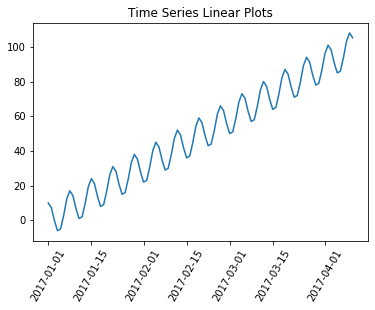

In [10]:
plt.plot(learning_progress.date, learning_progress.confidence)
plt.xticks(rotation=60)
plt.title('Time Series Linear Plots')
plt.show()

This looks to have a weekly pattern too it. Let's model it in terms of two factors: a trend line and a day of the week indicator. To get the indicator, we'll extract the day of the week from our dates and then convert it to a series of dummy variables.

In [11]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [12]:
print(X.columns)
print(lm.coef_)

Index(['0', '1', '2', '3', '4', '5', '6', 'date'], dtype='object')
[ 6.23489802 -2.22520934 -9.00968868 -9.00968868 -2.22520934  6.23489802
 10.          1.        ]


Here we see a series of coefficients for day of the week (with 0 corresponding to Monday). So you can see that mondays have higher confidence than Tuesdays through Friday, with it recovering again over the weekend. On top of that there is a daily trend, with confidence increasing on average 1 unit per day.

All of this has a model score of 1.0, by the way, because this is the exact equation used to create the data, if you discretize the oscillating function.

## Oscillators

We can also use trigonometric functions, specifically sine and cosine. 

These functions are oscillating functions. They have a period and an amplitude.

Text(0.5, 1.0, 'Cosine Function')

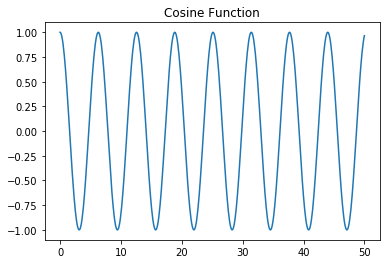

In [13]:
x = np.linspace(0, 50, 500)
plt.plot(x, np.cos(x))
plt.title('Cosine Function')

## A Brief Visit to Trigonometry

Maybe you remember the sine or cosine functions from previous math courses. They're derived from relationships from within triangles. How exactly that works isn't important for our purposes. We're not using them for their trigonometic properties. What's important for us is that they're a regularly repeating oscillating wave where we can control the height of the oscillations and their frequency. To that end, the wave has two features we need to know:

_Amplitude_ is how high the curve goes. For our purposes that is how big its oscillations move from the center. In the image above our amplitude is 1.

_Period_ is how long an oscillation is, or the length of the repeating pattern. Here the period is $2\pi$. 

When working with a linear model and seeing something that oscillates regularly and in a symmetric fashion, it might be useful to use a sine transformation and see if you can draw out periodicity. This can add a regular wiggle or movement up or down, say within a week or a season, to any other linear trends you may have. You have to find the duration of the oscillation yourself before applying the cosine or sine transform.

Let's try it with the data from before again.

In [14]:
X = pd.DataFrame()
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)

# Note that we're subtracting 17167 from date.
# This is to normalize it so that it starts at zero.
# This aligns the peak of the curve with the start of the cosine function.

X['cos_date'] = np.cos((X.date - 17167) * np.pi / 3.5)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

1.0

In [15]:
lm.coef_

array([ 1., 10.])


So, how do you find the duration of an oscillation? Well the easiest way is to have its period be present in the data. Things that repeat weekly have a weekly period. However, sometimes the period isn't so clear, like say if you see something monthly but it doesn't seem to perfectly line up with a clear start and end at the beginning of the month though you still see a regularly oscillating curve.

For that you'll need [__spectral analysis__](https://en.wikipedia.org/wiki/Spectral_density_estimation). Implementing spectral analysis is beyond the scope of this specialization; in practice you can often attain a reasonable esitmation through indicators and other techniques.

The main value of these trigonometric terms for seasonality is that they avoid overfitting by only offering a single term to match, the amplitude. Perhaps you're also manually estimating period. But other than that there is nowhere near the number of opportunities for overfitting, compared to say 12 indicators for month of the year.

## DRILL: What's the seasons?

Look at the data we created in the beginning. Analyze it to figure out how big a cycle is. Use your programming skills to derive the cycle time rather than looking at the code used to create the series.


In [17]:
# Your code here
learning_progress

,date,knowledge,confidence,day_of_week
0,2017-01-01,0,10.000000,6
1,2017-01-02,1,7.234898,0
2,2017-01-03,2,-0.225209,1
3,2017-01-04,3,-6.009689,2
4,2017-01-05,4,-5.009689,3
...,...,...,...,...
95,2017-04-06,95,85.990311,3
96,2017-04-07,96,93.774791,4
97,2017-04-08,97,103.234898,5
98,2017-04-09,98,108.000000,6


In [19]:
learning_progress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
date           100 non-null datetime64[ns]
knowledge      100 non-null int64
confidence     100 non-null float64
day_of_week    100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ KB


In [26]:
learning_progress.date = pd.to_datetime(learning_progress.date)

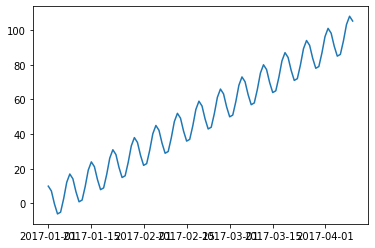

In [27]:
plt.plot(learning_progress.date,learning_progress.confidence);

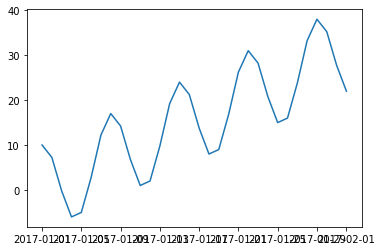

In [53]:
#examine one month
plt.plot(learning_progress.date[:32],learning_progress.confidence[:32]);
#trend is smaller than a month

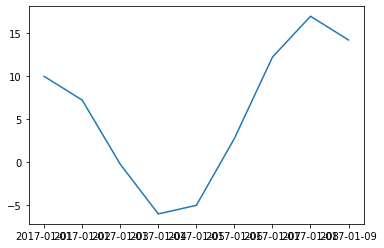

In [58]:
#examine one week 
plt.plot(learning_progress.date[:9],learning_progress.confidence[:9]);


In [64]:
cos = np.cos(learning_progress.confidence)
cos

0    -0.839072
1     0.580289
2     0.974747
3     0.962832
4     0.292939
        ...   
95   -0.392627
96    0.890211
97   -0.905746
98    0.375510
99   -0.008456
Name: confidence, Length: 100, dtype: float64

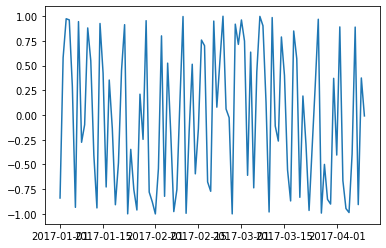

In [66]:
plt.plot(learning_progress.date,cos);
#without the oscilation there is still a trend

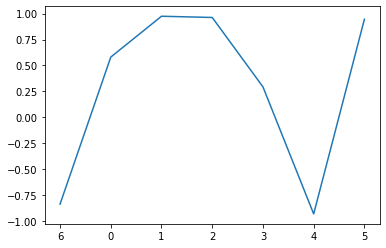

In [73]:
plt.plot(learning_progress.day_of_week[:7],cos[:7]);


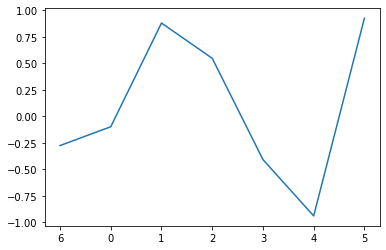

In [75]:
plt.plot(learning_progress.day_of_week[np.arange(7,14)],cos[np.arange(7,14)]);


In [76]:
#pretty similar trend for first and second week: increases days 0-1, decreases 1-4, goes back up after 4